In [4]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

h = 8
w = 8*1.61803398875

In [207]:
# Data the KB Curve is Based Upon
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/positive_phase_duration/raw/ppd-5-20-100-500.csv"
filePath = os.path.join(working_dir, data_path)
shot_data = pd.read_csv(filePath)
shot_data.head()

,scaled_dist,scaled_ppd,detonation
0,1.49,0.34,5-Ton TNT
1,1.72,0.44,5-Ton TNT
2,2.26,1.24,5-Ton TNT
3,2.26,1.24,5-Ton TNT
4,3.16,1.81,5-Ton TNT


In [ ]:
# Data the KB Curve is Based Upon
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/positive_phase_duration/raw/ppd-5-20-100-500.csv"
filePath = os.path.join(working_dir, data_path)
shot_data = pd.read_csv(filePath)
shot_data.head()

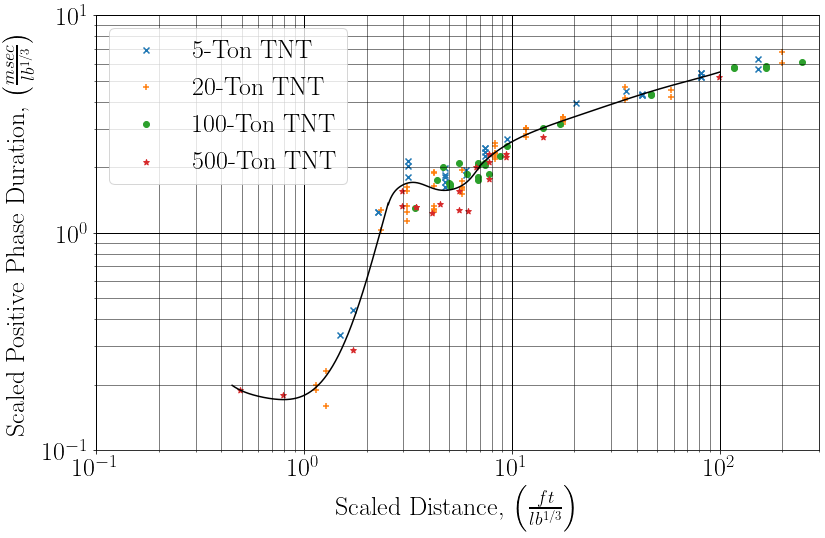

In [208]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)

else: #surface
    T1 = np.arange(0.450,2.54,0.001)
    TL1 = np.log10(T1)
    U1 = (-0.1790217052 + 5.25099193925*TL1)   
    Y1 = 10**(- 0.72867177600500*U1**0 + 0.13014371767500*U1**1
              + 0.13487251195400*U1**2 + 0.03915742769060*U1**3
              - 0.00475933664702*U1**4 - 0.00428144598008*U1**5)
    
    T2 = np.arange(2.54,7.00,0.001)
    TL2 = np.log10(T2)
    U2 = (-5.85909812338 + 9.2996288611*TL2)   
    Y2 = 10**(0.20096507334000*U2**0 - 0.02979442689760*U2**1
            + 0.03063295428800*U2**2 + 0.01834055740860*U2**3
            - 0.01739646662110*U2**4 - 0.00106321963633*U2**5
            + 0.00562060030977*U2**6 + 0.00016182174990*U2**7
            - 0.00068601889440*U2**8)

    T3 = np.arange(7.00,100.00,0.001)
    TL3 = np.log10(T3)
    U3 = (-4.92699491141 + 3.46349745571*TL3)   
    Y3 = 10**(0.572462469964*U3**0 + 0.09330353040090*U3**1
         - 0.000584942088300*U3**2 - 0.00226884995010*U3**3
         - 0.002959085915050*U3**4 + 0.00148029868929*U3**5)

pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(w, h))

mkr_dict = {'5-Ton TNT': 'x', '20-Ton TNT': '+', '100-Ton TNT': 'o', '500-Ton TNT': '*'}
for kind in mkr_dict:
    d = shot_data[shot_data.detonation==kind]
    ax.scatter(d.scaled_dist, d.scaled_ppd,  
                marker = mkr_dict[kind], label=kind)
ax.legend()

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.1,10)
plt.xlim(0.10,300)
plt.loglog(T1,Y1,color='black');
plt.loglog(T2,Y2,color='black');
plt.loglog(T3,Y3,color='black');
plt.ylabel(r'Scaled Positive Phase Duration, $\left(\frac{msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')

#ax.annotate('local max', xy=(3.2, 1.7), xytext=(4.1, 4.1),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

data_path = "5_reports/figures"
file_name = "fig_ppd_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

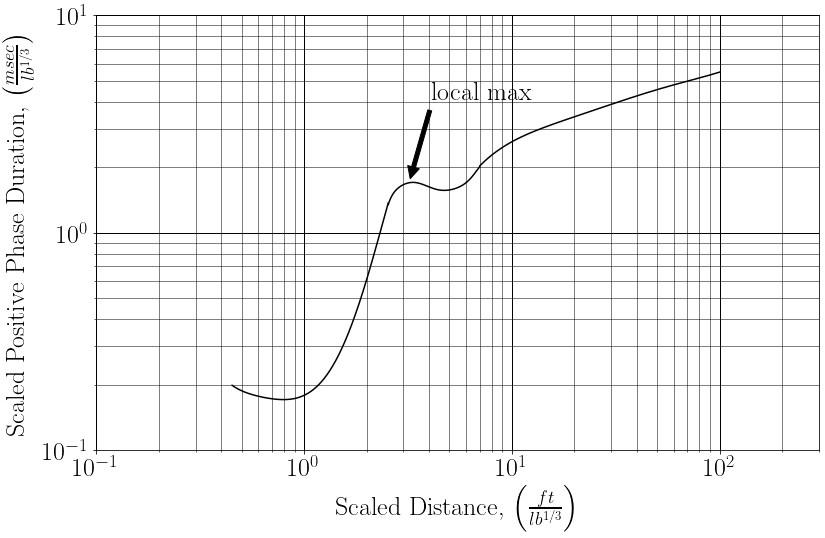

In [209]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)

else: #surface
    T1 = np.arange(0.450,2.54,0.001)
    TL1 = np.log10(T1)
    U1 = (-0.1790217052 + 5.25099193925*TL1)   
    Y1 = 10**(- 0.72867177600500*U1**0 + 0.13014371767500*U1**1
              + 0.13487251195400*U1**2 + 0.03915742769060*U1**3
              - 0.00475933664702*U1**4 - 0.00428144598008*U1**5)
    
    T2 = np.arange(2.54,7.00,0.001)
    TL2 = np.log10(T2)
    U2 = (-5.85909812338 + 9.2996288611*TL2)   
    Y2 = 10**(0.20096507334000*U2**0 - 0.02979442689760*U2**1
            + 0.03063295428800*U2**2 + 0.01834055740860*U2**3
            - 0.01739646662110*U2**4 - 0.00106321963633*U2**5
            + 0.00562060030977*U2**6 + 0.00016182174990*U2**7
            - 0.00068601889440*U2**8)

    T3 = np.arange(7.00,100.00,0.001)
    TL3 = np.log10(T3)
    U3 = (-4.92699491141 + 3.46349745571*TL3)   
    Y3 = 10**(0.572462469964*U3**0 + 0.09330353040090*U3**1
         - 0.000584942088300*U3**2 - 0.00226884995010*U3**3
         - 0.002959085915050*U3**4 + 0.00148029868929*U3**5)

pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(w, h))

mkr_dict = {'5-Ton TNT': 'x', '20-Ton TNT': '+', '100-Ton TNT': 'o', '500-Ton TNT': '*'}
for kind in mkr_dict:
    d = shot_data[shot_data.detonation==kind]
#    ax.scatter(d.scaled_dist, d.scaled_ppd,  
#                marker = mkr_dict[kind], label=kind)
#ax.legend()

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.1,10)
plt.xlim(0.10,300)
plt.loglog(T1,Y1,color='black');
plt.loglog(T2,Y2,color='black');
plt.loglog(T3,Y3,color='black');
plt.ylabel(r'Scaled Positive Phase Duration, $\left(\frac{msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')

ax.annotate('local max', xy=(3.2, 1.7), xytext=(4.1, 4.1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

data_path = "5_reports/figures"
file_name = "fig_ppd_no_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

In [275]:
# data points less than a scaled distance of 1
xData1 = shot_data[shot_data.scaled_dist <= 2].scaled_dist.values
yData1 = shot_data[shot_data.scaled_dist <= 2].scaled_ppd.values
xData2 = shot_data[shot_data.scaled_dist >= 6].scaled_dist.values
yData2 = shot_data[shot_data.scaled_dist >= 6].scaled_ppd.values

xData = np.append(xData1, xData2)
yData = np.append(yData1, yData2)

#define a quadratic equation
def func(x, a, b, c, d):
    a = -1
    b = -2
    c = 0.1
    d = -0.99
    return (a/(1+np.exp(b + c*x))) - d

# fit data points to quadratic equation
warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
fittedParameters, pcov = curve_fit(func, xData, yData, maxfev=10000)
print('Fitted parameters:', fittedParameters)
print()

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print()
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

Fitted parameters: [1. 1. 1. 1.]


RMSE: 3.409432914181701
R-squared: 0.27940804555352494



In [211]:
x = np.arange(2,6,0.1)

def func_ppd(T2):
    TL2 = np.log10(T2)
    U2 = (-5.85909812338 + 9.2996288611*TL2)   
    Y2 = 10**(0.20096507334000*U2**0 - 0.02979442689760*U2**1
            + 0.03063295428800*U2**2 + 0.01834055740860*U2**3
            - 0.01739646662110*U2**4 - 0.00106321963633*U2**5
            + 0.00562060030977*U2**6 + 0.00016182174990*U2**7
            - 0.00068601889440*U2**8)

    return Y2




yII = func_ppd(x)
yLM = func(x, *fittedParameters)
ratio = yII/yLM
times = np.mean(ratio)
print("The KB incident impulse model is %3.2f times greater than a simple power series fitted to the first two data points" % times)

The KB incident impulse model is 0.92 times greater than a simple power series fitted to the first two data points


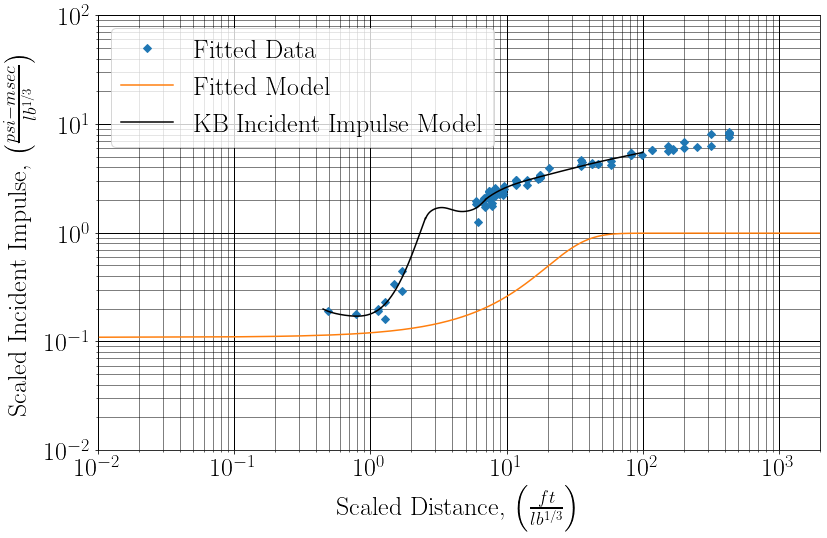

In [276]:
fig, ax = plt.subplots(figsize=(w, h))

mkr_dict = {'5-Ton TNT': 'x', '20-Ton TNT': '+', '100-Ton TNT': 'o', '500-Ton TNT': '*'}
for kind in mkr_dict:
    d = shot_data[shot_data.detonation==kind]
#    ax.scatter(d.scaled_dist, d.scaled_ii,  
#                marker = mkr_dict[kind], label=kind)
#ax.legend()

xModel = np.arange(0.01, 2000, .1)
yModel = func(xModel, *fittedParameters)

ax.plot(xData, yData, "D", label="Fitted Data")
ax.plot(xModel, yModel, label="Fitted Model")

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.01,100)
plt.xlim(0.01,2000)
plt.loglog(T1,Y1,color='black', label="KB Incident Impulse Model");
plt.loglog(T2,Y2,color='black');
plt.loglog(T3,Y3,color='black');
plt.ylabel(r'Scaled Incident Impulse, $\left(\frac{psi-msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')
#ax.fill_between(x, yII ,yLM, facecolor='orange', label="Average Increase of %3.2f Times" % times)
plt.legend()

data_path = "5_reports/figures"
file_name = "fig_ii_times_larger.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)
plt.show()

In [9]:
def ii_freeair():
    T = np.arange(0.134,2.001,0.001)
    TL = np.log10(T)
    U = (1.04504577747 + 3.24299066475*TL)   
    Y = 10**(1.43534136453000 - 0.4437493776910*U
        + 0.168825414684*U**2 + 0.0348138030308*U**3
        - 0.010435192824*U**4)

    S = np.arange(2.0,100.1,0.1)
    SL = np.log10(S)
    V = (-2.67912519532 + 2.30629231803*SL)
    X = 10**(0.599008468099 - 0.40463292088*V
         - 0.01427219460820*V**2 + 0.00912366316617*V**3
         - 0.00067506814040*V**4 - 0.00800863718901*V**5
         + 0.00314819515931*V**6 + 0.00152044783382*V**7
         - 0.00074702658990*V**8)
    return T, Y, S, X

def ii_surface():
    T1 = np.arange(0.17,2.42,0.01)
    TL1 = np.log10(T1)
    U1 = (0.832468843425 + 3.0760329666*TL1)   
    Y1 = 10**(1.57159240621 - 0.502992763686*U1
        + 0.1713356452350*U1**2 + 0.0450176963051*U1**3
        - 0.0118964626402*U1**4)

    T2 = np.arange(2.41,100.1,0.01)
    TL2 = np.log10(T2)
    U2 = (-2.91358616806 + 2.40697745406*TL2)
    Y2 = 10**(0.719852655584 - 0.384519026965*U2
        - 0.02601316706301*U2**2 + 0.00595798753822*U2**3
        + 0.01454452610700*U2**4 - 0.00663289334734*U2**5
        - 0.00284189327204*U2**6 + 0.00136448162270*U2**7)
    return T1, Y1, T2, Y2

def ppd_freeair():
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)
    return T, Y

def ppd_surface():
    '''
    Returns the complete positive phase duration in three
    array sets that equate to the scaled distances the
    equaitons are valid for.
    '''
    T1 = np.arange(0.450,2.54,0.001)
    TL1 = np.log10(T1)
    U1 = (-0.1790217052 + 5.25099193925*TL1)   
    Y1 = 10**(- 0.72867177600500*U1**0 + 0.13014371767500*U1**1
              + 0.13487251195400*U1**2 + 0.03915742769060*U1**3
              - 0.00475933664702*U1**4 - 0.00428144598008*U1**5)
    
    T2 = np.arange(2.54,7.00,0.001)
    TL2 = np.log10(T2)
    U2 = (-5.85909812338 + 9.2996288611*TL2)   
    Y2 = 10**(0.20096507334000*U2**0 - 0.02979442689760*U2**1
            + 0.03063295428800*U2**2 + 0.01834055740860*U2**3
            - 0.01739646662110*U2**4 - 0.00106321963633*U2**5
            + 0.00562060030977*U2**6 + 0.00016182174990*U2**7
            - 0.00068601889440*U2**8)

    T3 = np.arange(7.00,100.00,0.001)
    TL3 = np.log10(T3)
    U3 = (-4.92699491141 + 3.46349745571*TL3)   
    Y3 = 10**(0.572462469964*U3**0 + 0.09330353040090*U3**1
         - 0.000584942088300*U3**2 - 0.00226884995010*U3**3
         - 0.002959085915050*U3**4 + 0.00148029868929*U3**5)
    return T1, Y1, T2, Y2, T3, Y3

In [ ]:
P1, Q1, P2, Q2, P3, Q3 = ppd_surface():    
I1, J1, J2 = ii_surface()

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.1,10)
plt.xlim(0.10,300)
plt.loglog(P1,Q1,color='black');
plt.loglog(P2,Q2,color='black');
plt.loglog(P3,Q3,color='black');
plt.ylabel(r'Scaled Positive Phase Duration, $\left(\frac{msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')

ax.annotate('local max', xy=(3.2, 1.7), xytext=(4.1, 4.1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )